<a href="https://colab.research.google.com/github/MrIceAreBee11/MrIceAreBee11/blob/main/Project_BasedAssignmentMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Project-Based Assignment CLO-2</center>

<b>Topik</b>
Implementation of Supervised Learning on Regression Task

<b>Anggota Kelompok</b>
1. Kaisar Kertarajasa - 1301213276
2. Satya Rayyis Baruna - 1301213316
3. Nadim Rafli Hamzah - 1301210496

#### **Latar Belakang**
Penyakit Parkinson adalah penyakit neurodegeneratif, yang seiring berjalannya waktu akan semakin bertambah tingkat keparahannya. Tingkat keparahan penyakit parkinson dapat diukur dengan unified Parkinson's disease rating scale (UPDRS). Teknik pengukuran UPRDS secara tradisional cukup memakan waktu dan biaya.

In [1]:
# Import necessary modules
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [71]:
# fetch dataset
parkinsons_telemonitoring = fetch_ucirepo(id=189)
# data (as pandas dataframes)
X = parkinsons_telemonitoring.data.features
y = parkinsons_telemonitoring.data.targets
# metadata
print(parkinsons_telemonitoring.metadata)
# variable information
print(parkinsons_telemonitoring.variables)
# Remove missing values
X = X.dropna()


{'uci_id': 189, 'name': 'Parkinsons Telemonitoring', 'repository_url': 'https://archive.ics.uci.edu/dataset/189/parkinsons+telemonitoring', 'data_url': 'https://archive.ics.uci.edu/static/public/189/data.csv', 'abstract': "Oxford Parkinson's Disease Telemonitoring Dataset", 'area': 'Biology', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 5875, 'num_features': 19, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['motor_UPDRS', 'total_UPDRS'], 'index_col': ['subject#'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Sep 07 2023', 'dataset_doi': '10.24432/C5ZS3N', 'creators': ['Athanasios Tsanas', 'Max Little'], 'intro_paper': {'title': "Accurate Telemonitoring of Parkinson's Disease Progression by Noninvasive Speech Tests", 'authors': 'A. Tsanas, Max A. Little, P. McSharry, L. Ramig', 'published_in': 'IEEE Transactions on Biomedical Engineering', 'year': 2010

**Data Preproccessing**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Split dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Loss on test dataset: {loss}')

# Predict on the test set
y_pred = model.predict(X_test)
# Get the first half of y_test
y_test_half = y_test.iloc[:len(y_test)//2]
# Print some sample predictions
sample_predictions = pd.DataFrame({'Actual': y_test_half.values.flatten(), 'Predicted': y_pred.flatten()})
print(sample_predictions.head())


Epoch 1/100
147/147 [==============================] - 1s 3ms/step - loss: 573.7045 - val_loss: 419.3052
Epoch 2/100
147/147 [==============================] - 0s 2ms/step - loss: 304.6298 - val_loss: 241.2150
Epoch 3/100
147/147 [==============================] - 0s 2ms/step - loss: 190.2455 - val_loss: 165.2868
Epoch 4/100
147/147 [==============================] - 0s 2ms/step - loss: 141.5998 - val_loss: 137.2933
Epoch 5/100
147/147 [==============================] - 0s 2ms/step - loss: 121.5293 - val_loss: 123.2102
Epoch 6/100
147/147 [==============================] - 0s 2ms/step - loss: 109.4931 - val_loss: 112.9421
Epoch 7/100
147/147 [==============================] - 0s 2ms/step - loss: 101.6740 - val_loss: 105.8368
Epoch 8/100
147/147 [==============================] - 0s 3ms/step - loss: 96.5310 - val_loss: 100.6133
Epoch 9/100
147/147 [==============================] - 0s 2ms/step - loss: 92.7213 - val_loss: 97.6215
Epoch 10/100
147/147 [==============================] - 0s

In [87]:
print(data.head())  # Menampilkan beberapa baris pertama dari data
print(data.columns)  # Menampilkan nama kolom dalam dataset


         0         1         2         3         4         5         6   \
0  0.815695 -1.632090  0.082905 -0.284379  0.327453 -0.028637  0.328505   
1  0.815695 -1.500676 -0.560793 -0.756869 -0.533746 -0.476212 -0.534825   
2  0.815695 -1.369410 -0.238944 -0.540080 -0.300038 -0.320767 -0.298983   
3  0.815695 -1.257773 -0.155370 -0.484493 -0.344859 -0.170682 -0.344871   
4  0.815695 -1.108169 -0.498557 -0.665151 -0.658604 -0.529814 -0.659682   

         7         8         9         10        11        12        13  \
0 -0.324594 -0.351642 -0.209709 -0.423356 -0.543466 -0.209704 -0.298721   
1 -0.534016 -0.573156 -0.545158 -0.565592 -0.529955 -0.545153 -0.351965   
2 -0.669115 -0.564469 -0.741592 -0.702426 -0.645545 -0.741587 -0.199370   
3 -0.423692  0.069668 -0.460540 -0.449763 -0.392849 -0.460787 -0.071754   
4 -0.658276 -0.586186 -0.783145 -0.651413 -0.464905 -0.783392 -0.343370   

         14        15        16        17        18  
0 -0.009205 -1.214066 -1.478500 -0.650658 -0

**Explorating Data Analysis**

data decribe

Quantiles (Kuartil)
Q1 0    -0.771467
1    -0.861065
2    -0.457659
3    -0.601225
4    -0.450508
5    -0.390449
6    -0.451586
7    -0.577372
8    -0.590529
9    -0.595022
10   -0.561391
11   -0.591253
12   -0.595269
13   -0.354595
14   -0.529862
15   -0.709942
16   -0.804836
17   -0.691318
18   -0.682509
Name: 0.25, dtype: float64

Q3 0     0.815695
1     0.852926
2     0.114912
3     0.257594
4     0.096946
5     0.049086
6     0.096932
7     0.221221
8     0.234718
9     0.258333
10    0.216703
11    0.261911
12    0.258589
13   -0.011004
14    0.644297
15    0.718698
16    0.819445
17    0.490769
18    1.465182
Name: 0.75, dtype: float64

Range
0      5.555069
1      4.112054
2     17.632364
3     12.321982
4     18.315680
5     18.527458
6     18.317749
7     10.280278
8      9.038628
9     12.168337
10     9.907268
11    13.659124
12    12.168325
13    12.531559
14     8.440520
15     8.071724
16     4.958816
17     7.757586
18     2.147691
dtype: float64

Standard

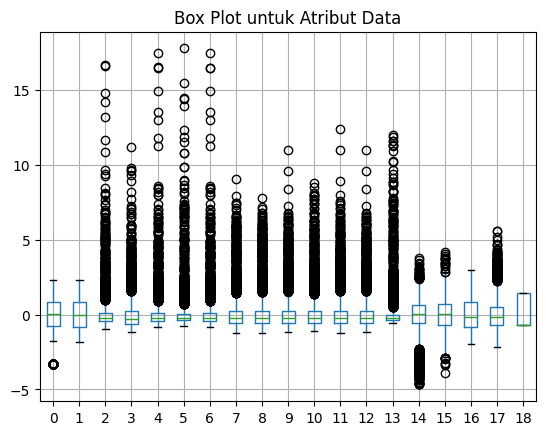

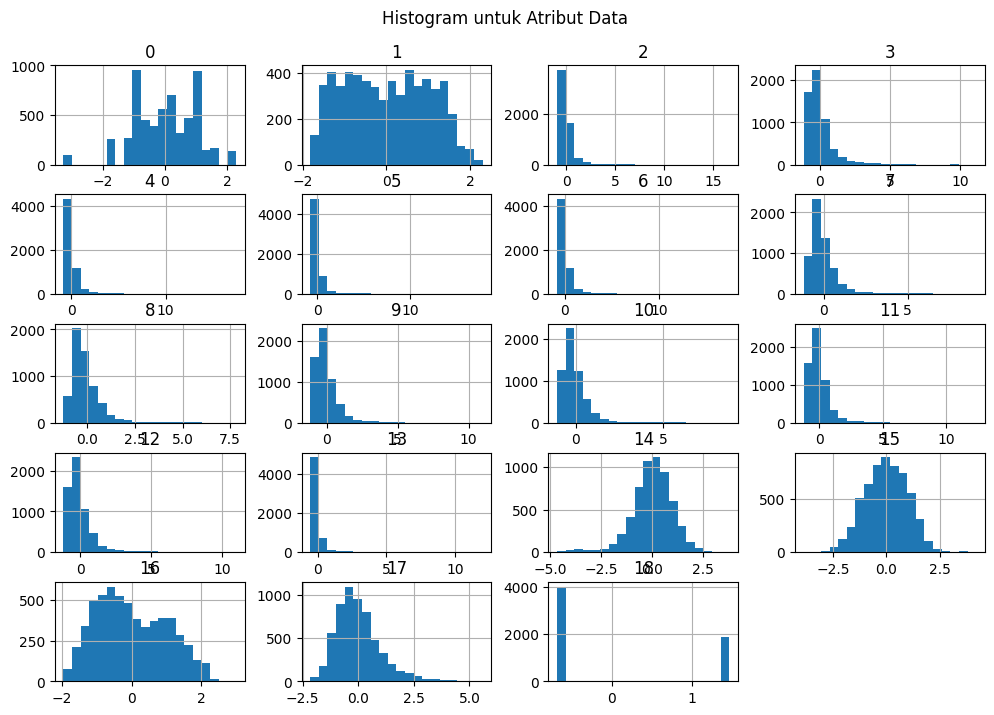

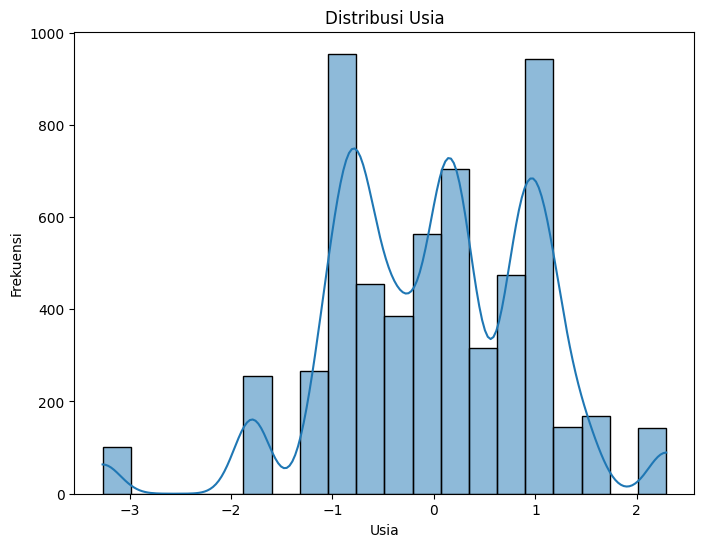

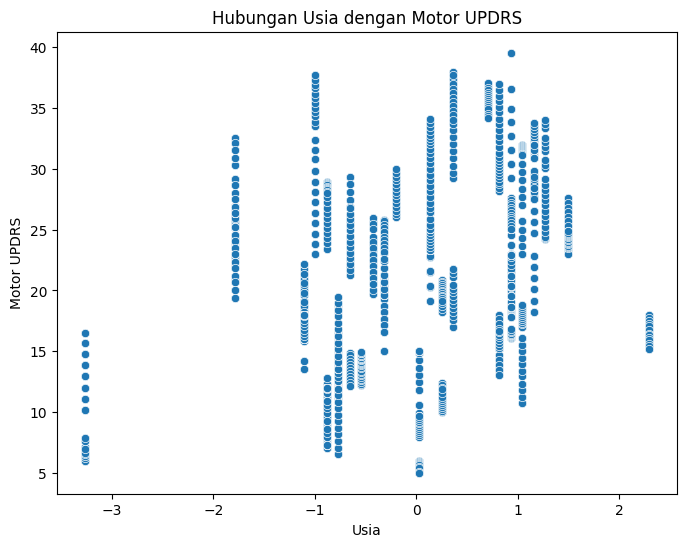

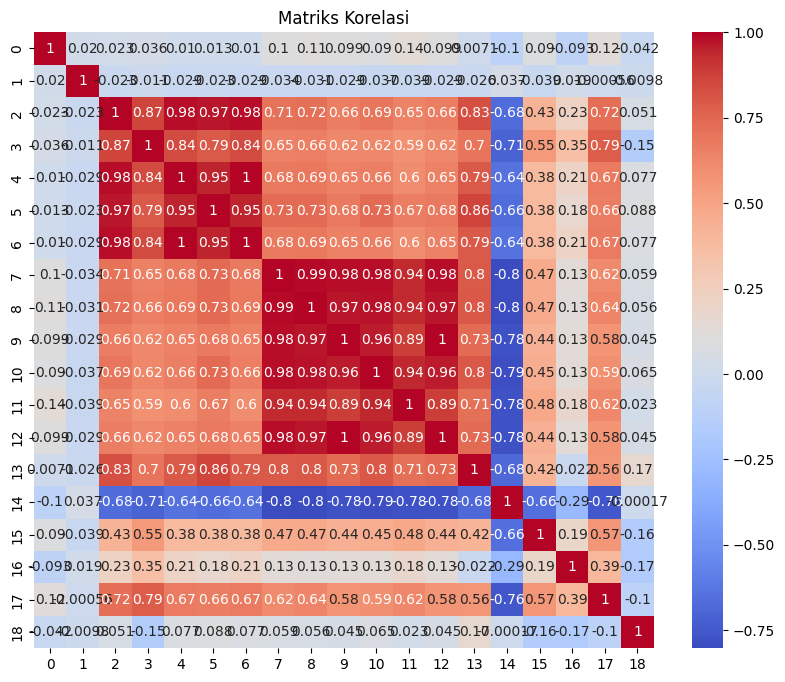

In [88]:
#Explorating Data Analysis
from ucimlrepo import fetch_ucirepo
import seaborn as sns
# Convert to a DataFrame
data = pd.DataFrame(data=X, columns=parkinsons_telemonitoring.feature_names)

# Statistik Deskriptif
print("data decribe")
print("\nQuantiles (Kuartil)")
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
print("Q1",q1)
print("\nQ3",q3)
print("\nRange")
data_range = data.max() - data.min()
print(data_range)
print("\nStandard Deviation")
std_deviation = data.std()
print(std_deviation)
print("\nVisualisasi Statistik")
data.boxplot()
plt.title('Box Plot untuk Atribut Data')
plt.show()
print("")
data.hist(bins=20, figsize=(12, 8))
plt.suptitle('Histogram untuk Atribut Data', x=0.5, y=0.95)
plt.show()
print("")

# Histogram untuk kolom ke-1 (indeks 0)
plt.figure(figsize=(8, 6))
sns.histplot(data.iloc[:, 0], bins=20, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()
print("")

# Scatter Plot kolom ke-1 (indeks 0) vs 'motor_UPDRS'
# Jika y adalah DataFrame, ambil salah satu kolom (misalnya, kolom pertama) sebagai target
y_target = y.iloc[:, 0]

# Scatter Plot kolom ke-1 (indeks 0) vs target
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data.iloc[:, 0], y=y_target)
plt.title('Hubungan Usia dengan Motor UPDRS')
plt.xlabel('Usia')
plt.ylabel('Motor UPDRS')
plt.show()
print("")

# Matriks Korelasi
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

**Baseline model**

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
baseline_model = LinearRegression()

# Train the model on the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = baseline_model.predict(X_test)

# Calculate the mean squared error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 74.66016662015873
R-squared (R2): 0.1402120827392191


**Model Exploration**

In [96]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
print("Model Exploration Scheme 1: Menggunakan Model ANN dengan Lebih Banyak Layer")
print("Dalam skema ini, kita akan menggunakan model ANN dengan lebih banyak layer dan neuron untuk melihat apakah ini dapat meningkatkan kinerja model.")
# Define a deeper neural network model
model1 = Sequential()
model1.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='linear'))

# Compile the model
model1.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))


Model Exploration Scheme 1: Menggunakan Model ANN dengan Lebih Banyak Layer
Dalam skema ini, kita akan menggunakan model ANN dengan lebih banyak layer dan neuron untuk melihat apakah ini dapat meningkatkan kinerja model.
Epoch 1/100
147/147 [==============================] - 1s 3ms/step - loss: 249.0553 - val_loss: 118.6783
Epoch 2/100
147/147 [==============================] - 0s 3ms/step - loss: 103.5670 - val_loss: 99.1296
Epoch 3/100
147/147 [==============================] - 0s 3ms/step - loss: 90.2785 - val_loss: 88.5296
Epoch 4/100
147/147 [==============================] - 1s 4ms/step - loss: 80.0650 - val_loss: 75.3673
Epoch 5/100
147/147 [==============================] - 1s 4ms/step - loss: 69.8879 - val_loss: 69.8528
Epoch 6/100
147/147 [==============================] - 1s 4ms/step - loss: 64.5584 - val_loss: 65.0402
Epoch 7/100
147/147 [==============================] - 1s 4ms/step - loss: 60.9011 - val_loss: 62.9448
Epoch 8/100
147/147 [==============================] - 

In [97]:
print("\nModel Exploration Scheme 2: Menggunakan Fungsi Aktivasi Berbeda")
print("Dalam skema ini, kita akan mencoba model ANN dengan fungsi aktivasi yang berbeda.")
# Define a neural network model with different activation function
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='tanh'))
model2.add(Dense(1, activation='linear'))

# Compile the model
model2.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))



Model Exploration Scheme 2: Menggunakan Fungsi Aktivasi Berbeda
Dalam skema ini, kita akan mencoba model ANN dengan fungsi aktivasi yang berbeda.
Epoch 1/100
147/147 [==============================] - 1s 3ms/step - loss: 677.2104 - val_loss: 605.2272
Epoch 2/100
147/147 [==============================] - 0s 2ms/step - loss: 483.1806 - val_loss: 373.0187
Epoch 3/100
147/147 [==============================] - 0s 2ms/step - loss: 263.7471 - val_loss: 189.5362
Epoch 4/100
147/147 [==============================] - 0s 2ms/step - loss: 138.6272 - val_loss: 115.6403
Epoch 5/100
147/147 [==============================] - 0s 2ms/step - loss: 100.0635 - val_loss: 97.9661
Epoch 6/100
147/147 [==============================] - 0s 2ms/step - loss: 92.3056 - val_loss: 93.7503
Epoch 7/100
147/147 [==============================] - 0s 2ms/step - loss: 90.2249 - val_loss: 92.1729
Epoch 8/100
147/147 [==============================] - 0s 2ms/step - loss: 89.1807 - val_loss: 90.8816
Epoch 9/100
147/147 

In [98]:
print("\nModel Exploration Scheme 3: Menggunakan Learning Rate Berbeda")
print("Dalam skema ini, kita akan mencoba model ANN dengan learning rate yang berbeda.")
# Define a neural network model with different learning rate
model3 = Sequential()
model3.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model3.add(Dense(1, activation='linear'))

# Compile the model with a different learning rate
model3.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001))

# Train the model
model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))



Model Exploration Scheme 3: Menggunakan Learning Rate Berbeda
Dalam skema ini, kita akan mencoba model ANN dengan learning rate yang berbeda.
Epoch 1/100
147/147 [==============================] - 1s 3ms/step - loss: 751.0883 - val_loss: 738.3608
Epoch 2/100
147/147 [==============================] - 0s 2ms/step - loss: 722.7468 - val_loss: 709.8875
Epoch 3/100
147/147 [==============================] - 0s 2ms/step - loss: 694.8949 - val_loss: 681.5877
Epoch 4/100
147/147 [==============================] - 0s 2ms/step - loss: 666.5103 - val_loss: 652.5497
Epoch 5/100
147/147 [==============================] - 0s 3ms/step - loss: 637.0284 - val_loss: 622.6724
Epoch 6/100
147/147 [==============================] - 0s 2ms/step - loss: 606.6516 - val_loss: 592.6674
Epoch 7/100
147/147 [==============================] - 0s 2ms/step - loss: 575.9025 - val_loss: 562.7333
Epoch 8/100
147/147 [==============================] - 0s 2ms/step - loss: 545.2305 - val_loss: 533.4070
Epoch 9/100
147/1

####**Hasil dan Analisis**


####**Kesimpulan**